<a href="https://colab.research.google.com/github/ngriggs/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')

In [0]:
print(df.shape)
df.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
df.sort_values('beer_servings', ascending=False)[:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [0]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

--2019-07-10 03:43:53--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv.1’

drinks.csv.1        100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-10 03:43:53 (75.0 MB/s) - ‘drinks.csv.1’ saved [4384/4384]



In [0]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
df['drinks_alcohol'] = df['total_litres_of_pure_alcohol'] > 0 

In [0]:
# Alternative code
import numpy as np
df['drinks_alcohol'] = np.where(df['total_litres_of_pure_alcohol'] > 0 , 'Yes', 'No')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,No
1,Albania,89,132,54,4.9,Yes
2,Algeria,25,0,14,0.7,Yes
3,Andorra,245,138,312,12.4,Yes
4,Angola,217,57,45,5.9,Yes


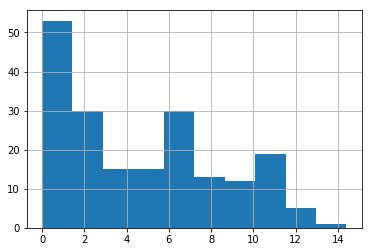

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
df.total_litres_of_pure_alcohol.hist()
plt.show()

In [0]:
df['drinks_alcohol'] = np.where(df['total_litres_of_pure_alcohol'] > 9, 'high',
                       np.where(df['total_litres_of_pure_alcohol'] == 0, 'none',
                       np.where(df['total_litres_of_pure_alcohol'] <=6 , 'medium', 'low')))
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,medium
2,Algeria,25,0,14,0.7,medium
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,medium


In [0]:
df['drinks_alcohol'].value_counts()

medium    105
low        41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [0]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')

In [0]:
df2 = df.join(countries[['name', 'region', 'sub-region']], how = 'left')
df2.head(20)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,medium,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,medium,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,medium,American Samoa,Oceania,Polynesia
5,Antigua & Barbuda,102,128,45,4.9,medium,Andorra,Europe,Southern Europe
6,Argentina,193,25,221,8.3,low,Angola,Africa,Sub-Saharan Africa
7,Armenia,21,179,11,3.8,medium,Anguilla,Americas,Latin America and the Caribbean
8,Australia,261,72,212,10.4,high,Antarctica,NaN,NaN
9,Austria,279,75,191,9.7,high,Antigua and Barbuda,Americas,Latin America and the Caribbean


In [0]:
df2 = pd.merge(df, countries[['name', 'region', 'sub-region']], how = 'left', left_on='country', right_on='name')
df2.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,medium,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,medium,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,medium,Angola,Africa,Sub-Saharan Africa
5,Antigua & Barbuda,102,128,45,4.9,medium,NaN,NaN,NaN
6,Argentina,193,25,221,8.3,low,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,medium,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,high,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,high,Austria,Europe,Western Europe


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            167 non-null object
region                          167 non-null object
sub-region                      167 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [0]:
df2.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            26
region                          26
sub-region                      26
dtype: int64

In [0]:
df.iloc[184]

country                         USA
beer_servings                   249
spirit_servings                 158
wine_servings                    84
total_litres_of_pure_alcohol    8.7
drinks_alcohol                  low
Name: 184, dtype: object

In [0]:
df['country'][184] = 'United States of America'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
df.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                       low
Name: 184, dtype: object

In [0]:
# This should produce no copy warning
df.at[184, 'country'] = 'United States of America'

In [0]:
df2.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    27
Oceania     15
Name: region, dtype: int64

In [0]:
df2['sub-region'].value_counts()

Sub-Saharan Africa                 42
Latin America and the Caribbean    26
Western Asia                       16
Southern Europe                    12
Northern Europe                     9
South-eastern Asia                  8
Eastern Europe                      8
Southern Asia                       8
Western Europe                      8
Northern Africa                     6
Central Asia                        5
Polynesia                           5
Melanesia                           4
Micronesia                          4
Eastern Asia                        3
Australia and New Zealand           2
Northern America                    1
Name: sub-region, dtype: int64

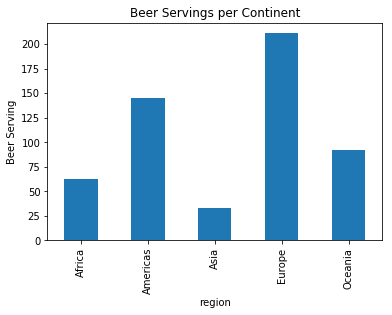

In [0]:
df2.groupby('region').beer_servings.mean().plot(kind='bar');
plt.title('Beer Servings per Continent')
plt.ylabel('Beer Serving');

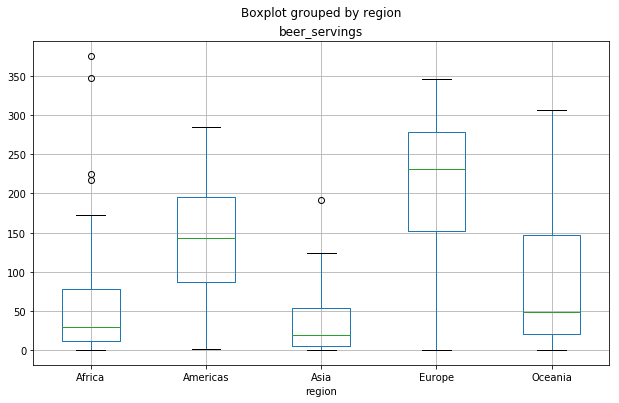

In [0]:
df2.boxplot(column='beer_servings', by='region', figsize=(10, 6));

In [0]:
import seaborn as sns

In [0]:
df2 = df2.dropna(subset=['region'])
df2.shape

(167, 9)

In [0]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()
x = df2.beer_servings.values
y = df2.wine_servings.values
country = df2.country
region = df2.region
source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])
palette = d3['Category10'][len(df2['region'].unique())]
mapper = CategoricalColorMapper(factors = df2['region'].unique(), palette = palette)
# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")
# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)
# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"
output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

KeyError: ignored

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example
import pandas as pd
import numpy as np
df0 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/grad-students.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/majors-list.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')

In [74]:
df0.head(5)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [75]:
df1.head(5)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,53000,110000.0,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,40000,89000.0,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,45000,100000.0,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,24500,85000.0,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,40600,83700.0,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [76]:
df2.head(5)

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources


In [77]:
df3.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [78]:
df4.head(5)

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000


In [0]:
df0 = df0.drop(['Major_category', 'Major_code'], axis=1);
df1 = df1.drop(['Major_category', 'Major_code'], axis=1);
df3 = df3.drop(['Major_code', 'Major_category', 'Total'], axis=1);
df4 = df4.drop(['Rank', 'Major_code', 'Major_category', 'Men', 'Women', 'Median'], axis=1);

In [0]:
dfs = [df0,df1,df3]

In [128]:
df_final = df2
for i in dfs:
  df_final = pd.merge(i, df_final, on='Major')
df_final.sort_values('Rank')
df_final.head(30)

,Rank,Major,Men,Women,ShareWomen,Sample_size,Employed_x,Full_time,Part_time,Full_time_year_round,Unemployed_x,Unemployment_rate_x,Median_x,P25th_x,P75th_x,College_jobs,Non_college_jobs,Low_wage_jobs,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium,Total,Employed_y,Employed_full_time_year_round,Unemployed_y,Unemployment_rate_y,Median_y,P25th_y,P75th_y,FOD1P,Major_Category
0,1,PETROLEUM ENGINEERING,2057.0,282.0,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,7479,164,5640,4869,112,0.019471,124000.0,80000,200000.0,18483,13108,11334,580,0.042373,126000.0,75000,215000.0,0.288075,-0.015873,19631,14002,11636,617,0.042205,125000,75000,210000.0,2419,Engineering
1,2,MINING AND MINERAL ENGINEERING,679.0,77.0,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,6083,126,4491,4038,271,0.056909,100000.0,72000,140000.0,10460,7161,6270,366,0.048625,95000.0,52000,125000.0,0.367708,0.052632,10746,7416,6419,366,0.047032,92000,52000,124000.0,2416,Engineering
2,3,METALLURGICAL ENGINEERING,725.0,131.0,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,13656,251,9299,8095,218,0.022906,100000.0,74000,135000.0,12555,6692,5415,310,0.044273,98000.0,66000,123000.0,0.521003,0.020408,12818,6939,5462,326,0.044873,96000,65000,123000.0,2415,Engineering
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,10801,197,6739,6332,222,0.031892,102000.0,70000,145000.0,15759,10596,9044,449,0.040652,100000.0,60000,128000.0,0.406664,0.020000,16094,10690,9226,449,0.040309,97000,60000,125000.0,2417,Engineering
4,5,CHEMICAL ENGINEERING,21239.0,11021.0,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,168136,3306,124544,106097,4997,0.038575,102000.0,70000,150000.0,173332,120146,103629,5413,0.043111,90000.0,62000,123000.0,0.492392,0.133333,188046,131697,109406,6388,0.046261,86000,60000,120000.0,2405,Engineering
5,6,NUCLEAR ENGINEERING,2200.0,373.0,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244,10520,243,8567,8018,100,0.011538,110000.0,85000,148000.0,8688,6730,6258,144,0.020949,100000.0,65000,130000.0,0.547688,0.100000,9826,7320,6474,527,0.067159,95000,65000,128000.0,2418,Engineering
6,7,ACTUARIAL SCIENCE,2110.0,1667.0,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259,2472,56,2020,1725,162,0.074244,110000.0,80000,150000.0,7998,6666,6040,266,0.038373,76000.0,53000,125000.0,0.236103,0.447368,9763,7846,6880,466,0.056064,72000,53000,115000.0,6202,Business
7,8,ASTRONOMY AND ASTROPHYSICS,832.0,960.0,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220,6331,136,5480,4548,112,0.020029,96000.0,60000,150000.0,3899,2720,2163,298,0.098741,85000.0,56000,109000.0,0.618866,0.129412,4700,3400,2447,320,0.086022,80000,40000,106000.0,5001,Physical Sciences
8,9,MECHANICAL ENGINEERING,80320.0,10907.0,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253,347342,7285,266923,234162,9810,0.035449,100000.0,75000,138000.0,547538,395914,348301,16897,0.040932,82000.0,60000,110000.0,0.388144,0.219512,581529,422207,362053,19360,0.043844,80000,59000,110000.0,2414,Engineering
9,10,ELECTRICAL ENGINEERING,65511.0,16016.0,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170,482767,10070,371723,324080,13974,0.036231,106000.0,80000,145000.0,645159,471850,413582,24278,0.048935,90000.0,62000,118000.0,0.428013,0.177778,671647,489965,422317,26064,0.050509,88000,60000,116000.0,2408,Engineering




1.   Lets figure out what percentage of majors earning over $50,000 is engineering
2.   Lets also plot the average income of each major category
3.   Lets figure out the percentage of women in each major category





In [129]:
over_50k = df_final.loc[df_final['Median_x']>50000]
engineering = len(over_50k[over_50k['Major_Category'] == 'Engineering'])
percent_engineering = (engineering / len(over_50k))*100
print(percent_engineering, '% of majors earning over $50000 fall in the Engineering category')

76.0 % of majors earning over $50000 fall in the Engineering category


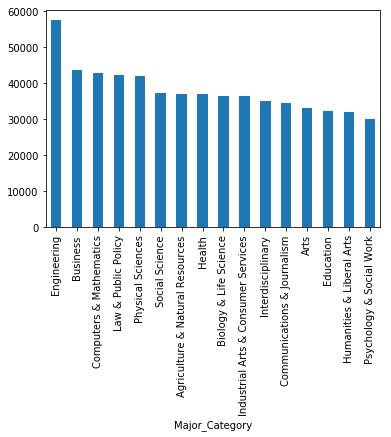

In [137]:
average_salary = df_final.groupby('Major_Category')['Median_x'].mean()
average_salary.sort_values(ascending=False).plot(kind='bar');

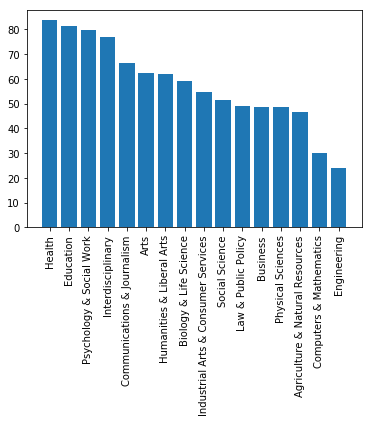

In [215]:
import matplotlib.pyplot as plt
from operator import itemgetter
number_women = df_final.groupby('Major_Category')['Women'].sum()
number_men = df_final.groupby('Major_Category')['Men'].sum()
test = []
for i in range(len(number_women)):
  test.append((number_women[i]/(number_women[i]+number_men[i]))*100)

test2 = df_final['Major_Category'].unique()
test2 = sorted(test2)
zipped = sorted(zip(test2, test), key=itemgetter(1), reverse=True)
percent_women = list(zipped)
plt.bar(*zip(*percent_women))

plt.xticks(rotation=90);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




1. Using data curated by authors at the website fivethirtyeight, I tried to answer some questions about college majors that I thought would be interesting. I wanted to see which major had the highest average income for all students associated with that major, which major had the highest percentage of women, and which category of majors would be the most lucrative. I took 4 datasets available on fivethirtyeight and combined them to have a broad view of different statistics associated with each major. I then proceeded to answer the aforementioned questions. 
2. The most challenging part was cleaning the data, and figuring out how to combine it without ending up with a huge dataset with multiple repeat columns. I ended up not being able to complete this (primarily because after finishing ~90% I accidentally erased all of my work).
3. The most interesting thing I learned here was some new stuff with the sort function and zipping lists together. 
4. I'd like to explore data cleaning more at this point. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.